In [484]:
import numpy as np
import pandas as pd
import pickle
import os 
import cx_Oracle
from datetime import datetime as dt
import datetime 

In [487]:
datetime.timedelta(1)

datetime.timedelta(days=1)

# Read Files & Clean Data

In [289]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\Bigdata\EMI and Tenure Estimation")

In [290]:
df_account=pd.read_csv(os.getcwd()+"\Data Files\BD_CB_ACCOUNT_7days.csv")

In [291]:
df_dpd= pd.read_csv(os.getcwd()+"\Data Files\BD_CB_DPD_FINAL_7days.csv")

In [292]:
df_account.head()

,SKP_CREDIT_CASE,SKP_CLIENT,SKP_CREDIT_TYPE,DATE_DECISION,SOURCE_ID,NUM_GROUP_POSITION_1,ACCOUNT_STATUS,INSTALMENT_CNT,DPD_MAX,DPD_L1I,...,DATE_REPORTED,TYPE_COLLATERAL,AMT_COLLATERAL,AMT_WRITTEN_OFF,WRITTEN_OFF_STATUS,AMT_WRITTEN_OFF_PRINCIPAL,SUITE_FILED,AMT_SETTLEMENT,DPD_ORDER,PRODUCT_GROUP
0,298877771,57629904,2,22-03-20,CIBIL,0,NaN,4,0.0,0.0,...,31-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,ACL
1,299113058,87542423,1,22-03-20,CIBIL,0,NaN,5,0.0,0.0,...,16-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,CD
2,299114486,87552975,1,22-03-20,CIBIL,0,NaN,2,30.0,30.0,...,31-01-20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,CD
3,299114777,3776564,1,22-03-20,CIBIL,0,NaN,8,33.0,3.0,...,26-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,CD
4,299114961,51553626,1,22-03-20,CIBIL,0,NaN,17,0.0,0.0,...,31-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,CD


In [293]:
df_account['DATE_DECISION']=pd.to_datetime(df_account['DATE_DECISION'],format = '%d-%m-%y')
df_account['DATE_HISTORY_START']=pd.to_datetime(df_account['DATE_HISTORY_START'],format = '%d-%m-%y')
df_account['DATE_HISTORY_END']=pd.to_datetime(df_account['DATE_HISTORY_END'],format = '%d-%m-%y')
df_account['DATE_LAST_PAY']=pd.to_datetime(df_account['DATE_LAST_PAY'],format = '%d-%m-%y')
df_account['DATE_OPEN']=pd.to_datetime(df_account['DATE_OPEN'],format = '%d-%m-%y')
df_account['DATE_CLOSED']=pd.to_datetime(df_account['DATE_CLOSED'],format = '%d-%m-%y')


# EDA

In [294]:
important_columns = ['AMT_EMI','PAY_FREQUENCY','REPAY_TENURE','INSTALMENT_CNT','AMT_APPROVED','EIR','TYPE','REPORTING_MEMBER','ACCOUNT_NUMBER']
potential_columns = ['AMT_CURRENT_BALANCE','AMT_OVERDUE','DATE_HISTORY_START','DATE_HISTORY_END','DATE_LAST_PAY','DATE_OPEN', 'DATE_CLOSED']
extra_analysis = ['AMT_CREDIT_LIMIT','AMT_CASH_LIMIT']

### Fill Rate of all columns

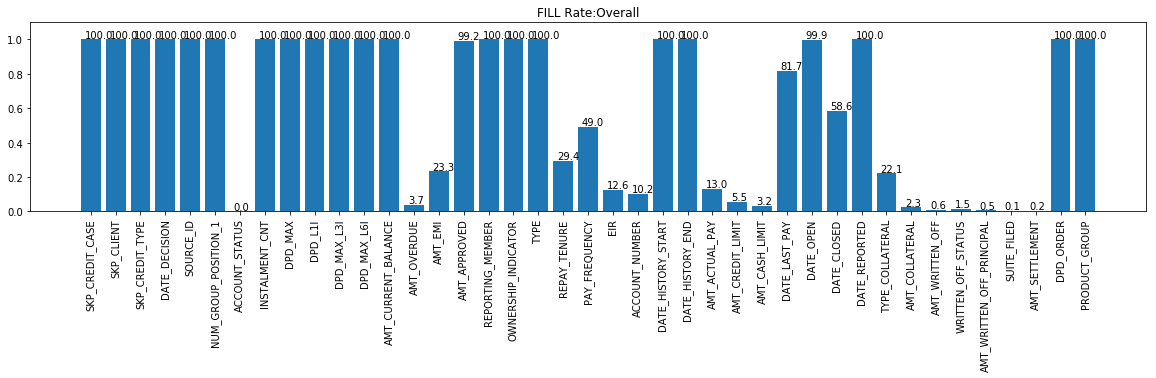

In [295]:
df_tmp = pd.DataFrame(df_account.count()/len(df_account)).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
fig = plt.figure(figsize = (20,16))
ax1= fig.add_subplot(4,1,1)
ax1.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Overall")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.1f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90,)
plt.ylim(0,1.1)
plt.show()

In [296]:
df_account.REPORTING_MEMBER.value_counts()/len(df_account)

NOT DISCLOSED    0.898318
HOME CREDIT      0.101682
Name: REPORTING_MEMBER, dtype: float64

### Fill Rate of required columns with loan type

In [297]:
list1=['AMT_EMI','REPAY_TENURE','EIR','INSTALMENT_CNT','AMT_APPROVED','AMT_CURRENT_BALANCE','PAY_FREQUENCY',
 'AMT_OVERDUE','DATE_HISTORY_START','DATE_HISTORY_END','DATE_LAST_PAY','DATE_OPEN','DATE_CLOSED','AMT_CREDIT_LIMIT','AMT_CASH_LIMIT']

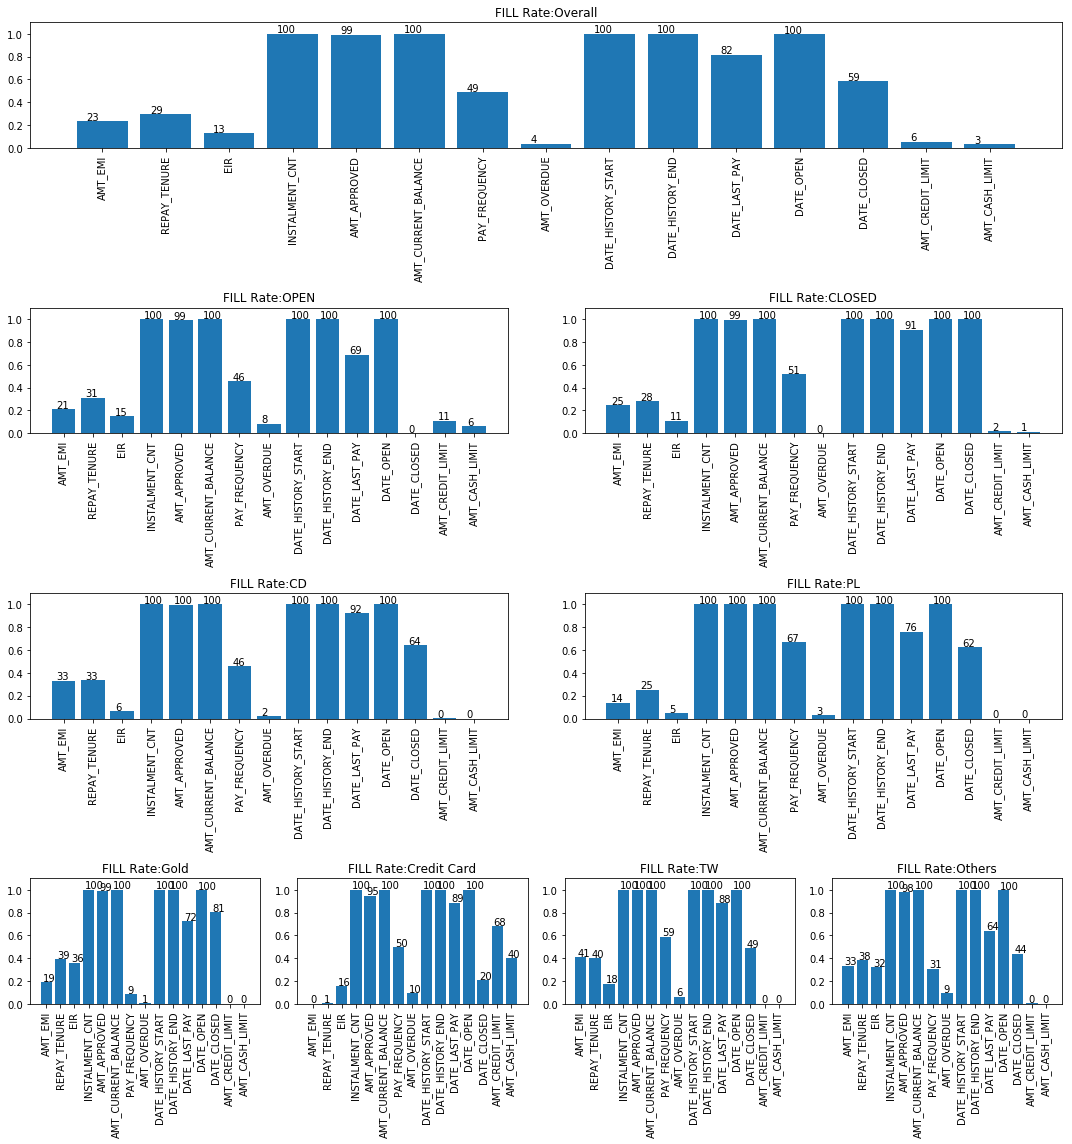

In [298]:
df_tmp = pd.DataFrame(df_account[list1].count()/len(df_account)).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
fig = plt.figure(figsize = (15,16))
ax1= fig.add_subplot(4,1,1)
ax1.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Overall")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90,)
plt.ylim(0,1.1)


#OPEN
df_tmp = pd.DataFrame(df_account[df_account.DATE_CLOSED.isna()][list1].count()/len(df_account[df_account.DATE_CLOSED.isna()])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,2,3)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:OPEN")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#CLOSED
df_tmp = pd.DataFrame(df_account[~df_account.DATE_CLOSED.isna()][list1].count()/len(df_account[~df_account.DATE_CLOSED.isna()])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,2,4)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:CLOSED")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#CD
df_tmp = pd.DataFrame(df_account[df_account.TYPE==6][list1].count()/len(df_account[df_account.TYPE==6])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,2,5)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:CD")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#PL
df_tmp = pd.DataFrame(df_account[df_account.TYPE==5][list1].count()/len(df_account[df_account.TYPE==5])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,2,6)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:PL")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#GL
df_tmp = pd.DataFrame(df_account[df_account.TYPE==7][list1].count()/len(df_account[df_account.TYPE==7])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,4,13)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Gold")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#CC
df_tmp = pd.DataFrame(df_account[df_account.TYPE==10][list1].count()/len(df_account[df_account.TYPE==10])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,4,14)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Credit Card")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#TW
df_tmp = pd.DataFrame(df_account[df_account.TYPE==13][list1].count()/len(df_account[df_account.TYPE==13])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,4,15)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:TW")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#Others
df_tmp = pd.DataFrame(df_account[~df_account.TYPE.isin([6,5,7,10,13])][list1].count()/len(df_account[~df_account.TYPE.isin([6,5,7,10,13])])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(4,4,16)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Others")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

plt.tight_layout()
plt.show()

### Fill rate for HC vs Others and usibility of current_balance

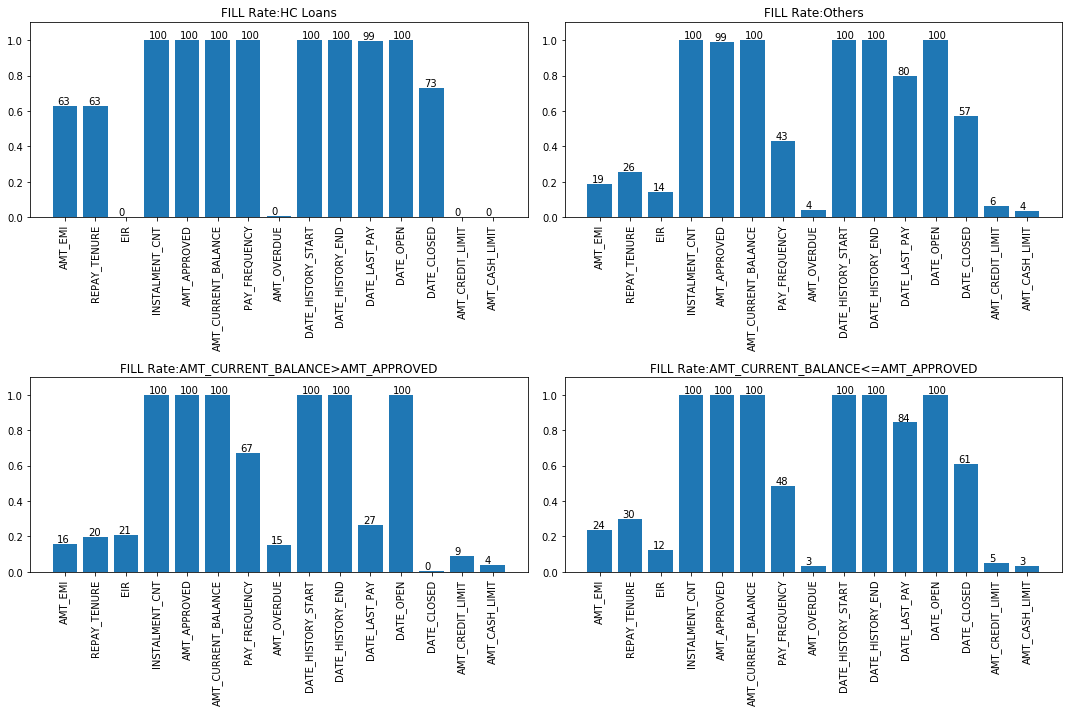

In [299]:

fig = plt.figure(figsize = (15,10))

#HC
df_tmp = pd.DataFrame(df_account[df_account.REPORTING_MEMBER == 'HOME CREDIT'][list1].count()/len(df_account[df_account.REPORTING_MEMBER == 'HOME CREDIT'])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(2,2,1)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:HC Loans")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#NOT HC
df_tmp = pd.DataFrame(df_account[df_account.REPORTING_MEMBER != 'HOME CREDIT'][list1].count()/len(df_account[df_account.REPORTING_MEMBER != 'HOME CREDIT'])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(2,2,2)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:Others")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)


#HC
df_tmp = pd.DataFrame(df_account[df_account.AMT_CURRENT_BALANCE>df_account.AMT_APPROVED][list1].count()/len(df_account[df_account.AMT_CURRENT_BALANCE>df_account.AMT_APPROVED])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(2,2,3)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:AMT_CURRENT_BALANCE>AMT_APPROVED")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

#NOT HC
df_tmp = pd.DataFrame(df_account[df_account.AMT_CURRENT_BALANCE<=df_account.AMT_APPROVED][list1].count()/len(df_account[df_account.AMT_CURRENT_BALANCE<=df_account.AMT_APPROVED])).reset_index()
df_tmp.columns = ["COLUMN_NAME","FILL_RATE"]
ax2= fig.add_subplot(2,2,4)
ax2.bar(df_tmp.COLUMN_NAME,df_tmp.FILL_RATE)
plt.title("FILL Rate:AMT_CURRENT_BALANCE<=AMT_APPROVED")
for i, txt in enumerate(df_tmp.FILL_RATE):
    plt.annotate("{:.0f}".format(txt*100), ((i-0.25, df_tmp.FILL_RATE[i]+0.01)))
plt.xticks(rotation = 90)
plt.ylim(0,1.1)

plt.tight_layout()
plt.show()

### Top loan types

In [300]:
(df_account.TYPE.value_counts()/len(df_account)*100).head(10)

6     33.515379
5     33.096188
7      9.002206
10     8.058580
13     5.643027
0      3.266719
1      1.690738
2      0.996545
53     0.765842
17     0.649300
Name: TYPE, dtype: float64

### HC Loans proportion 

In [302]:
df_account.REPORTING_MEMBER.value_counts()

NOT DISCLOSED    302160
HOME CREDIT       34202
Name: REPORTING_MEMBER, dtype: int64

### Correlation between installment count and date_history_start and date_history_end

In [303]:
pd.DataFrame({"x":(df_account["DATE_HISTORY_START"]-df_account["DATE_HISTORY_END"]).dt.days/30.5+1,"y":df_account["INSTALMENT_CNT"]}).corr()

,x,y
x,1.00000,0.88073
y,0.88073,1.00000


In [304]:
df_tmp =pd.DataFrame({"x":(df_account["DATE_HISTORY_START"]-df_account["DATE_HISTORY_END"]).dt.days/30.5+1,"y":df_account["INSTALMENT_CNT"],'z':df_account['PAY_FREQUENCY']})

In [305]:
df_account[["SKP_CREDIT_CASE","PAY_FREQUENCY","AMT_EMI"]].groupby("PAY_FREQUENCY").count()

,SKP_CREDIT_CASE,AMT_EMI
PAY_FREQUENCY,,
FORTNIGHTLY,39,19
MONTHLY,164498,64945
QUARTERLY,33,13
WEEKLY,313,284


In [306]:
df_account['PAY_FREQUENCY'].value_counts()

MONTHLY        164498
WEEKLY            313
FORTNIGHTLY        39
QUARTERLY          33
Name: PAY_FREQUENCY, dtype: int64

# Analyse Results

In [499]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [580]:
df_account["EIR"]= np.where(df_account["EIR"]/100>1,df_account["EIR"]/100>1, df_account["EIR"])
df_agg=df_account[["TYPE","EIR","REPAY_TENURE","AMT_EMI"]].dropna().groupby('TYPE').agg(["mean","median",percentile(1),percentile(95)])
df_agg.columns = [x+"_"+y for (x,y) in np.ravel(df_agg.columns)]
df_agg.reset_index(inplace=True)


In [680]:
df_agg.to_csv(os.getcwd()+r"\Data Files\agg_data.csv")

In [702]:
df_valid = df_account[(~df_account.AMT_EMI.isna()) & (~df_account.EIR.isna()) & (~df_account.REPAY_TENURE.isna())]
df_valid = df_valid[["AMT_OVERDUE","DPD_ORDER","INSTALMENT_CNT","AMT_APPROVED","AMT_CURRENT_BALANCE","REPAY_TENURE","EIR","AMT_EMI","DATE_CLOSED","DATE_OPEN","TYPE","DATE_HISTORY_START","DATE_HISTORY_END"]]

#df_valid["INSTALMENT_CNT"] =df_valid[["INSTALMENT_CNT","REPAY_TENURE"]].min(axis=1)

df_valid["HIST_DAYS"] = round(abs((df_valid["DATE_HISTORY_START"]-df_valid["DATE_HISTORY_END"])).dt.days/30.5)
df_valid["OPEN_DAYS"] = np.where(df_valid["DATE_CLOSED"].isna(),0,round(abs((df_valid["DATE_OPEN"]-df_valid["DATE_CLOSED"])).dt.days/30.5))

df_valid["INSTALMENT_CNT"] = df_valid[["INSTALMENT_CNT","HIST_DAYS"]].max(axis=1)
df_valid["REPAY_TENURE"] = df_valid[["REPAY_TENURE","HIST_DAYS","OPEN_DAYS"]].max(axis=1)

df_valid = df_valid[df_valid.AMT_EMI<=1.5*df_valid.AMT_APPROVED]
# df_valid = df_valid[df_valid.AMT_EMI<=(3*df_valid.AMT_APPROVED-df_valid.AMT_CURRENT_BALANCE)/df_valid.INSTALMENT_CNT]
# df_valid = df_valid[df_valid.AMT_EMI>=(df_valid.AMT_APPROVED-df_valid.AMT_CURRENT_BALANCE)/df_valid.INSTALMENT_CNT*0.5]

df_valid["EIR"]= np.where(df_valid["EIR"]/100>1,df_valid["EIR"]/100, df_valid["EIR"])
df_valid["INSTALMENT_CNT"] = np.where(df_valid["DATE_CLOSED"].isna(),df_valid["INSTALMENT_CNT"], df_valid["REPAY_TENURE"])

#Check impact of this
df_valid["INSTALMENT_CNT"] = np.where(df_valid["AMT_CURRENT_BALANCE"]!=0,df_valid["INSTALMENT_CNT"], df_valid["REPAY_TENURE"])


df_valid["EMI_CALCULATED"] = (df_valid.AMT_APPROVED*np.power((1+(df_valid.EIR/1200)),df_valid.INSTALMENT_CNT)-df_valid.AMT_CURRENT_BALANCE)*(df_valid.EIR/1200)/(np.power((1+(df_valid.EIR/1200)),df_valid.INSTALMENT_CNT)-1)
df_valid["EMI_CALCULATED1"]= (df_valid.AMT_APPROVED*np.power((1+(df_valid.EIR/1200)),df_valid.REPAY_TENURE)*(df_valid.EIR/1200))/(np.power((1+(df_valid.EIR/1200)),df_valid.REPAY_TENURE)-1)

df_valid = df_valid.merge(df_agg[["TYPE","AMT_EMI_percentile_1","AMT_EMI_percentile_95","REPAY_TENURE_percentile_1","REPAY_TENURE_percentile_95","EIR_percentile_95","EIR_percentile_1","EIR_mean"]],on = "TYPE", how = 'inner')

df_valid["EMI_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["EMI_CALCULATED","AMT_EMI_percentile_95"]].min(axis = 1),df_valid["EMI_CALCULATED"])
df_valid["EMI_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["EMI_CALCULATED","AMT_EMI_percentile_1"]].max(axis=1),df_valid["EMI_CALCULATED"])


df_valid["TENURE_CALCULATED"] = (np.log(df_valid.EMI_CALCULATED/(df_valid.EMI_CALCULATED-df_valid.AMT_APPROVED*df_valid.EIR/1200))/np.log(1+df_valid.EIR/1200))
df_valid["TENURE_CALCULATED1"] = (np.log(df_valid.AMT_EMI/(df_valid.AMT_EMI-df_valid.AMT_APPROVED*df_valid.EIR/1200))/np.log(1+df_valid.EIR/1200))

df_valid["TENURE_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["TENURE_CALCULATED","REPAY_TENURE_percentile_95"]].min(axis = 1),df_valid["TENURE_CALCULATED"])
df_valid["TENURE_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["TENURE_CALCULATED","REPAY_TENURE_percentile_1"]].max(axis=1),df_valid["TENURE_CALCULATED"])

df_valid["RATE_CALCULATED"] = (df_valid.AMT_CURRENT_BALANCE+df_valid.AMT_EMI*df_valid.INSTALMENT_CNT-df_valid.AMT_APPROVED)/(df_valid.AMT_APPROVED*df_valid.INSTALMENT_CNT)*1200
df_valid["RATE_CALCULATED1"] = (df_valid.AMT_EMI*df_valid.REPAY_TENURE-df_valid.AMT_APPROVED)/(df_valid.AMT_APPROVED*df_valid.REPAY_TENURE)*1200

df_valid["RATE_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["RATE_CALCULATED","EIR_percentile_95"]].min(axis = 1),df_valid["RATE_CALCULATED"])
df_valid["RATE_CALCULATED"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["RATE_CALCULATED","EIR_percentile_1"]].max(axis=1),df_valid["RATE_CALCULATED"])



df_valid["TENURE_CALCULATED2"] = (np.log(df_valid.AMT_EMI/(df_valid.AMT_EMI-df_valid.AMT_APPROVED*df_valid.RATE_CALCULATED/1200))/np.log(1+df_valid.RATE_CALCULATED/1200))

df_valid["TENURE_CALCULATED2"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["TENURE_CALCULATED2","REPAY_TENURE_percentile_95"]].min(axis = 1),df_valid["TENURE_CALCULATED2"])
df_valid["TENURE_CALCULATED2"]=np.where(df_valid["DATE_CLOSED"].isna(),df_valid[["TENURE_CALCULATED2","REPAY_TENURE_percentile_1"]].max(axis=1),df_valid["TENURE_CALCULATED2"])


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log


In [703]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_valid.dropna(subset = ["EMI_CALCULATED","EMI_CALCULATED1"],inplace = True)
#df_valid = df_valid[df_valid["AMT_EMI"]<df_valid["AMT_EMI"].quantile(0.90)]
df_valid = df_valid[df_valid["AMT_EMI"]*df_valid["REPAY_TENURE"]<3*df_valid["AMT_APPROVED"]]

print(np.sqrt(mean_squared_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED"])))
print(np.sqrt(mean_squared_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED1"])))

print(mean_absolute_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED"]))
print(mean_absolute_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED1"]))

36753.409046777946
5530.557613541169
3257.2828942295114
1032.8748948639834


In [698]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_valid.dropna(subset = ["TENURE_CALCULATED","TENURE_CALCULATED1"],inplace = True)
df_valid = df_valid[~df_valid["TENURE_CALCULATED"].isin([np.inf,np.nan])]
df_valid = df_valid[~df_valid["TENURE_CALCULATED1"].isin([np.inf,np.nan])]

#df_valid = df_valid[df_valid["AMT_EMI"]<df_valid["AMT_EMI"].quantile(0.90)]
df_valid = df_valid[df_valid["AMT_EMI"]*df_valid["REPAY_TENURE"]<3*df_valid["AMT_APPROVED"]]

print(np.sqrt(mean_squared_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED"])))
print(np.sqrt(mean_squared_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED1"])))

print(mean_absolute_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED"]))
print(mean_absolute_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED1"]))

39.487126647185896
45.553973403979434
9.505797791359068
6.663300602529667


In [694]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_valid.dropna(subset = ["RATE_CALCULATED","RATE_CALCULATED1"],inplace = True)
df_valid = df_valid[~df_valid["RATE_CALCULATED"].isin([np.inf,np.nan])]
df_valid = df_valid[~df_valid["RATE_CALCULATED1"].isin([np.inf,np.nan])]

#df_valid = df_valid[df_valid["AMT_EMI"]<df_valid["AMT_EMI"].quantile(0.90)]
df_valid = df_valid[df_valid["AMT_EMI"]*df_valid["REPAY_TENURE"]<3*df_valid["AMT_APPROVED"]]

print(np.sqrt(mean_squared_error(df_valid["EIR"],df_valid["RATE_CALCULATED"])))
print(np.sqrt(mean_squared_error(df_valid["EIR"],df_valid["RATE_CALCULATED1"])))

print(mean_absolute_error(df_valid["EIR"],df_valid["RATE_CALCULATED"]))
print(mean_absolute_error(df_valid["EIR"],df_valid["RATE_CALCULATED1"]))

539.5109877945746
78.306719921016
17.992295263948833
20.017973500917538


In [686]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_valid.dropna(subset = ["TENURE_CALCULATED2","TENURE_CALCULATED1"],inplace = True)
df_valid = df_valid[~df_valid["TENURE_CALCULATED2"].isin([np.inf,np.nan])]
df_valid = df_valid[~df_valid["TENURE_CALCULATED1"].isin([np.inf,np.nan])]

#df_valid = df_valid[df_valid["AMT_EMI"]<df_valid["AMT_EMI"].quantile(0.90)]
df_valid = df_valid[df_valid["AMT_EMI"]*df_valid["REPAY_TENURE"]<3*df_valid["AMT_APPROVED"]]

print(np.sqrt(mean_squared_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED2"])))
print(np.sqrt(mean_squared_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED1"])))

print(mean_absolute_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED2"]))
print(mean_absolute_error(df_valid["REPAY_TENURE"],df_valid["TENURE_CALCULATED1"]))

20.86655209798058
45.61908465122837
7.388245634262463
6.670854859093703


In [687]:
print(df_valid.EIR.mean())
print(df_valid.RATE_CALCULATED.mean())
print(df_valid.RATE_CALCULATED1.mean())


df_valid["CURRENT_BALANCE_FLAG"]=np.where(df_valid["AMT_CURRENT_BALANCE"]>=df_valid["AMT_APPROVED"],1,0)
df_valid["CLOSED_FLAG"]=np.where(df_valid["DATE_CLOSED"].isna(),0,1)

df_valid.to_csv(os.getcwd()+r"\Data Files\formula_result_analyse3.csv")

16.852375186231814
18.93682124405103
17.96860440368724


# Deeper analysis of dates

# Propose Formula

In [468]:
df_valid = df_account[(~df_account.AMT_EMI.isna()) & (~df_account.EIR.isna()) & (~df_account.REPAY_TENURE.isna())]

df_valid = df_valid[["AMT_OVERDUE","DPD_ORDER","INSTALMENT_CNT","AMT_APPROVED","AMT_CURRENT_BALANCE","REPAY_TENURE","EIR","AMT_EMI","DATE_CLOSED","DATE_OPEN","TYPE","DATE_HISTORY_START","DATE_HISTORY_END"]]

#df_valid["INSTALMENT_CNT"] =df_valid[["INSTALMENT_CNT","REPAY_TENURE"]].min(axis=1)

df_valid["HIST_DAYS"] = round(abs((df_valid["DATE_HISTORY_START"]-df_valid["DATE_HISTORY_END"])).dt.days/30.5)
df_valid["OPEN_DAYS"] = np.where(df_valid["DATE_CLOSED"].isna(),0,round(abs((df_valid["DATE_OPEN"]-df_valid["DATE_CLOSED"])).dt.days/30.5))

df_valid["INSTALMENT_CNT"] = df_valid[["INSTALMENT_CNT","HIST_DAYS"]].max(axis=1)
df_valid["REPAY_TENURE"] = df_valid[["REPAY_TENURE","HIST_DAYS","OPEN_DAYS"]].max(axis=1)

df_valid = df_valid[df_valid.AMT_EMI<=1.5*df_valid.AMT_APPROVED]
df_valid["EIR"]= np.where(df_valid["EIR"]/100>1,df_valid["EIR"]/100>1, df_valid["EIR"])
df_valid["INSTALMENT_CNT"] = np.where(df_valid["DATE_CLOSED"].isna(),df_valid["INSTALMENT_CNT"], df_valid["REPAY_TENURE"])
df_valid["INSTALMENT_CNT"] = np.where(df_valid["AMT_CURRENT_BALANCE"]!=0,df_valid["INSTALMENT_CNT"], df_valid["REPAY_TENURE"])


df_valid["EMI_CALCULATED"] = (df_valid.AMT_APPROVED*np.power((1+(df_valid.EIR/1200)),df_valid.INSTALMENT_CNT)-df_valid.AMT_CURRENT_BALANCE)*(df_valid.EIR/1200)/(np.power((1+(df_valid.EIR/1200)),df_valid.INSTALMENT_CNT)-1)

df_valid["EMI_CALCULATED1"]= (df_valid.AMT_APPROVED*np.power((1+(df_valid.EIR/1200)),df_valid.REPAY_TENURE)*(df_valid.EIR/1200))/(np.power((1+(df_valid.EIR/1200)),df_valid.REPAY_TENURE)-1)


In [469]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_valid.dropna(subset = ["EMI_CALCULATED","EMI_CALCULATED1"],inplace = True)
#df_valid = df_valid[df_valid["AMT_EMI"]<df_valid["AMT_EMI"].quantile(0.90)]
df_valid = df_valid[df_valid["AMT_EMI"]*df_valid["REPAY_TENURE"]<3*df_valid["AMT_APPROVED"]]

print(np.sqrt(mean_squared_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED"])))
print(np.sqrt(mean_squared_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED1"])))

print(mean_absolute_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED"]))
print(mean_absolute_error(df_valid["AMT_EMI"],df_valid["EMI_CALCULATED1"]))


36753.40904677794
5530.557613541169
3257.2828942295114
1032.8748948639834


In [470]:
df_valid.shape

(21118, 17)

In [471]:
print(df_valid.AMT_EMI.mean())
print(df_valid.EMI_CALCULATED.mean())
print(df_valid.EMI_CALCULATED1.mean())


df_valid["CURRENT_BALANCE_FLAG"]=np.where(df_valid["AMT_CURRENT_BALANCE"]>=df_valid["AMT_APPROVED"],1,0)
df_valid["CLOSED_FLAG"]=np.where(df_valid["DATE_CLOSED"].isna(),0,1)

df_valid.to_csv(os.getcwd()+r"\Data Files\formula_result_analyse_1.csv")

5912.4189317170185
6668.340892926708
6369.949541770926
